#Submitted by Sarvesh Gurumurthy for 73 Strings ML internship

In [1]:
# Importing the necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Mounting the drive

In [3]:
fin=open("sentiment_labels.txt",'rt',encoding='utf-8')#please make sure the text file is in the same directory where you run the project
s = {'Phrase_id':[],'Sentiment_values':[]}
for line in fin:
  s['Phrase_id'].append(line.split('|')[0])
  s['Sentiment_values'].append(line.split('|')[1].rstrip('\n'))
df1 = pd.DataFrame(s)


In [4]:
#df1 is for sentiment values

In [5]:
df1.head()

,Phrase_id,Sentiment_values
0,phrase ids,sentiment values
1,0,0.5
2,1,0.5
3,2,0.44444
4,3,0.5


In [6]:
df1 = df1.drop([0])
#for dropping the first row which is no use to us now

In [7]:
df1.reset_index
#reseting the index of the dataframe

<bound method DataFrame.reset_index of        Phrase_id Sentiment_values
1              0              0.5
2              1              0.5
3              2          0.44444
4              3              0.5
5              4          0.42708
...          ...              ...
239228    239227          0.36111
239229    239228          0.38889
239230    239229          0.33333
239231    239230          0.88889
239232    239231              0.5

[239232 rows x 2 columns]>

In [8]:
df1.head()

,Phrase_id,Sentiment_values
1,0,0.5
2,1,0.5
3,2,0.44444
4,3,0.5
5,4,0.42708


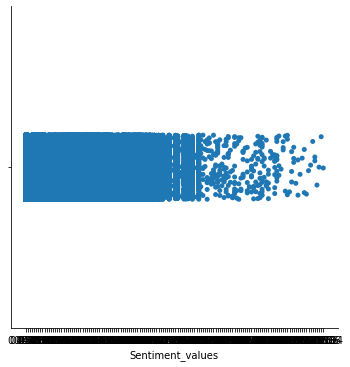

In [9]:
sns.catplot(data=df1,x='Sentiment_values')
#Plotting sentiment value distribution across phrase ids

In [10]:
df1['Sentiment_values'] = df1['Sentiment_values'].apply(lambda x : float(x)) #data type of the sentiment values to be float

In [11]:
len(df1[df1['Sentiment_values']>0.5].values)#computing the number of phrases which has sentiment values more than 0.5

106181

In [12]:
len(df1[df1['Sentiment_values']<=0.5].values)#computing the number of phrases which has sentiment values less than or equal to 0.5

133051

In [13]:
df1['Sentiment_values'][1]

0.5

In [14]:
106181+133051#total number of phrases

239232

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94bea0cd68>]],
      dtype=object)

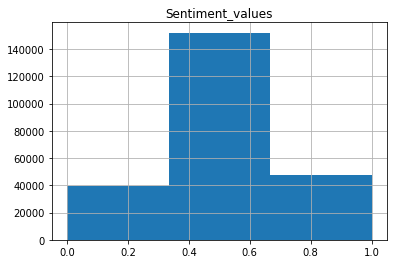

In [15]:
df1.hist(bins=3)

In [16]:
df1.shape#phrase id and their sentiment values

(239232, 2)

In [21]:
fin4=open("dictionary.txt",'rt',encoding='utf-8')
s4 = {'phrases':[],'Phrase_id':[]}
for line in fin4:
  #pre-processing the data
  s4['phrases'].append(line.split('|')[0])
  #removing the \n at the end of the every line 
  s4['Phrase_id'].append(line.split('|')[-1].rstrip('\n'))
df4 = pd.DataFrame(s4)

In [22]:
df4.head() #df4 contains the phrases and it's ids

,phrases,Phrase_id
0,!,0
1,! ',22935
2,! '',18235
3,! Alas,179257
4,! Brilliant,22936


In [23]:
df4.shape

(239232, 2)

In [24]:
phrase_df = pd.merge(df4,df1,on='Phrase_id')#merging the 2 dataframes df1 and df2 on the basis of their phrase ids to form a super-dataframe

In [25]:
phrase_df.head()

,phrases,Phrase_id,Sentiment_values
0,!,0,0.50000
1,! ',22935,0.52778
2,! '',18235,0.50000
3,! Alas,179257,0.44444
4,! Brilliant,22936,0.86111


In [26]:
#importing nltk for getting the stopwords in the english-language-corpus
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

stopword = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
#importing string to remove the punctuations that exists as a word itself
import string
phrase_df['phrases'] = phrase_df['phrases'].apply(lambda line:line.lower())
phrase_df['phrases'] = phrase_df['phrases'].apply(lambda line:[wrd.lower() for wrd in line.split()[1:] if wrd.lower() not in stopword and wrd not in string.punctuation and wrd not in ['\'s']])
# starting from index 1 cuz to avoid the few punctuations in the beginning

In [29]:
#removing empty lists 
print('Before removing the empty lists',phrase_df.shape[0])
phrase_df = phrase_df[phrase_df['phrases'].map(lambda d: len(d)) > 0]
print('After removing the empty lists',phrase_df.shape[0])
#removing the duplicates
print('Before removing the duplicates',phrase_df.shape[0])
phrase_df['phrases_i'] = phrase_df.phrases.apply(lambda x: tuple(x))
phrase_df.drop_duplicates(subset='phrases_i',keep='first',inplace=True)
print('After removing the duplicates',phrase_df.shape[0])
#converting list to a str
phrase_df['phrases'] = phrase_df['phrases'].apply(lambda line: " ".join(line))
print("Before dropping the missing values, missing values:",phrase_df['Sentiment_values'].isnull().sum().sum())
phrase_df.dropna(inplace=True)
print("After dropping the missing values, missing values:",phrase_df['Sentiment_values'].isnull().sum().sum())


phrase_df.reset_index(inplace=True)
phrases= list(phrase_df['phrases'])
sentiment = list(phrase_df['Sentiment_values'])

Before removing the empty lists 239232
After removing the empty lists 208469
Before removing the duplicates 208469
After removing the duplicates 103070
Before dropping the missing values, missing values: 0
After dropping the missing values, missing values: 0


In [30]:
phrase_df['Sentiment_values'].describe()

count    103070.000000
mean          0.513612
std           0.189026
min           0.000000
25%           0.388890
50%           0.500000
75%           0.638890
max           1.000000
Name: Sentiment_values, dtype: float64

In [31]:
len(phrases)

103070

In [32]:
len(sentiment)

103070

In [33]:
phrase_df = phrase_df.drop(['index'],axis=1)
phrase_df.head()

,phrases,Phrase_id,Sentiment_values,phrases_i
0,'',18235,0.50000,"('',)"
1,alas,179257,0.44444,"(alas,)"
2,brilliant,22936,0.86111,"(brilliant,)"
3,c'mon,60624,0.47222,"(c'mon,)"
4,gollum performance incredible,13402,0.76389,"(gollum, performance, incredible)"


In [34]:
phrases[4]

'gollum performance incredible'

In [35]:
# word vectorizing the phrases using the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(lowercase=False).fit(phrase_df['phrases'])
bow = bow_transformer.transform(phrase_df['phrases'])

In [36]:
# Passing the bow to the term frequency - inverse document frequency
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer().fit(bow)
X_tf = tf_transformer.transform(bow)

In [37]:
# Using Random forest regressor for predicting the sentiment values
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=15, random_state=42)
regr.fit(X_tf, sentiment)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [97]:
#reading the scrapped csv file into a dataframe called inp
inp = pd.read_csv('Scraping reviews_1_new.csv')
inp['reviews']=inp['reviews'].astype(str)
inp['mobile']=inp['mobile'].astype(str)

In [98]:
inp.head()

,reviews,mobile
0,\n\n Defective product shipped.. reported wi...,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage..."
1,\n\n Nice phone camera better attractive look...,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage..."
2,\n\n Design-GoodCamera-NiceDisplay-satisfacto...,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage..."
3,\n\n The headphone jack is not working 😡 Des...,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage..."
4,"\n\n First sell, First order. Mobile is very ...","Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage..."


In [99]:
#Pre-processing the data
inp['reviews'] = inp['reviews'].apply(lambda line:line.lower().strip('\n\n'))

In [100]:
inp['reviews'] = inp['reviews'].apply(lambda line:[wrd.lower() for wrd in line.split()[1:] if wrd.lower() not in stopword and wrd not in string.punctuation and wrd not in ['\'s']])

In [101]:
#removing empty lists 
print('Before removing the empty lists',inp.shape[0])
inp = inp[inp['reviews'].map(lambda d: len(d)) > 0]
print('After removing the empty lists',inp.shape[0])
#removing the duplicates
print('Before removing the duplicates',inp.shape[0])
inp['reviews_i'] = inp.reviews.apply(lambda x: tuple(x))
inp.drop_duplicates(subset='reviews_i',keep='first',inplace=True)
print('After removing the dupicates',inp.shape[0])
inp['reviews'] = inp['reviews'].apply(lambda line: " ".join(line))
inp.reset_index

Before removing the empty lists 23417
After removing the empty lists 22003
Before removing the duplicates 22003
After removing the dupicates 10090


<bound method DataFrame.reset_index of                                                  reviews  ...                                          reviews_i
0      product shipped.. reported within hours receip...  ...  (product, shipped.., reported, within, hours, ...
1                    phone camera better attractive look  ...          (phone, camera, better, attractive, look)
2          backup-up markoverall-must phone redmi lovers  ...  (backup-up, markoverall-must, phone, redmi, lo...
3      headphone jack working 😡 despite customer care...  ...  (headphone, jack, working, 😡, despite, custome...
4                      sell, first order. mobile nice...  ...            (sell,, first, order., mobile, nice...)
...                                                  ...  ...                                                ...
23409  first question nokia that, buy scrap ₹3400/- ?...  ...  (first, question, nokia, that,, buy, scrap, ₹3...
23410  wants loot people again. want go stone age aga... 

In [102]:
#prediction
pred_input = bow_transformer.transform(inp['reviews'])
pred_input_tf = tf_transformer.transform(pred_input)
p = regr.predict(pred_input_tf)

In [103]:
p

array([0.51017151, 0.51017151, 0.51017151, ..., 0.51017151, 0.54295228,
       0.52764235])

In [104]:
p.max()

0.9347052004991984

In [105]:
inp.shape

(10090, 3)

In [106]:
inp['Sentiment_values'] = pd.Series(p)
inp = inp.drop(['reviews_i'],axis=1)

In [107]:
inp.head()

,reviews,mobile,Sentiment_values
0,product shipped.. reported within hours receip...,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",0.510172
1,phone camera better attractive look,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",0.510172
2,backup-up markoverall-must phone redmi lovers,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",0.510172
3,headphone jack working 😡 despite customer care...,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",0.510172
4,"sell, first order. mobile nice...","Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",0.510172


In [108]:
inp['Sentiment_values'].describe()

count    4800.000000
mean        0.512364
std         0.081898
min         0.101129
25%         0.510172
50%         0.510172
75%         0.527642
max         0.934705
Name: Sentiment_values, dtype: float64

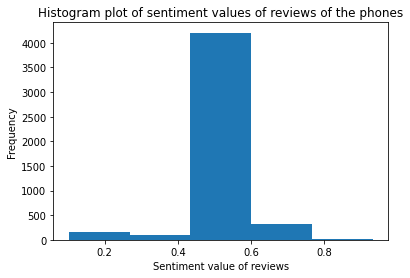

From this histogram, I can infer that the maximum number of reviews(approximately 4200) hace a sentiment value between 0.42 to 0.78 roughly.


In [116]:
x =inp['Sentiment_values']
plt.title('Histogram plot of sentiment values of reviews of the phones')
plt.xlabel('Sentiment value of reviews')
plt.ylabel('Frequency')
plt.hist(x, bins = 5)
plt.show()


print('From this histogram, I can infer that the maximum number of reviews(approximately 4200) hace a sentiment value between 0.42 to 0.78 roughly.')

In [113]:
#Removing rows with null values
inp.dropna(inplace=True)
inp.shape


(4800, 3)

In [114]:
inp.groupby('mobile', as_index=False)['Sentiment_values'].mean()

,mobile,Sentiment_values
0,"OPPO A5 2020 (Dazzling White, 4GB RAM, 64GB St...",0.515664
1,"OPPO A5 2020 (Mirror Black, 3GB RAM, 64GB Stor...",0.525390
2,"Panasonic Eluga i7 (2GB RAM, 16GB Storage, Fin...",0.504566
3,"Redmi 8A Dual (Midnight Grey, 2GB RAM, 32GB St...",0.528839
4,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",0.505543
5,"Redmi 8A Dual (Sky White, 2GB RAM, 32GB Storag...",0.498265
6,"Samsung Galaxy M01 Core (Black, 2GB RAM, 32GB ...",0.515569
7,"Samsung Galaxy M01 Core (Blue, 2GB RAM, 32GB S...",0.517668
8,"Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64...",0.520165
9,"Samsung Galaxy M21 (Midnight Blue, 6GB RAM, 12...",0.488718


In [117]:
inp.to_csv('Submission_1.csv')